In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

In [2]:
data_sucio = pd.read_csv('ChinaData.csv')
data_sucio.head(5)

,id,source,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,first_review,last_review,review_scores_rating,review_scores_accuracy,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,103760,city scrape,304876,Brendan,30/11/2010,Hong Kong,within a day,100%,69%,f,...,19/06/2011,13/02/2024,4.47,4.40,f,6,2,4,0,1.92
1,248140,previous scrape,1300549,Darren,17/10/2011,Hong Kong,within an hour,100%,81%,f,...,30/10/2011,06/12/2024,4.90,4.91,f,1,1,0,0,1.37
2,263081,city scrape,1370155,Chuster,04/11/2011,Hong Kong,within a few hours,100%,NaN,f,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,274589,city scrape,1435069,Shanshan,23/11/2011,Hong Kong,within a day,100%,86%,t,...,16/12/2011,02/11/2024,4.77,4.76,f,1,1,0,0,1.90
4,280746,city scrape,1443229,Shan,26/11/2011,Hong Kong,within a few hours,100%,88%,f,...,21/04/2012,06/12/2024,4.25,4.20,t,2,2,0,0,0.36


In [3]:
data_sucio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6718 non-null   int64  
 1   source                                        6718 non-null   object 
 2   host_id                                       6718 non-null   int64  
 3   host_name                                     6718 non-null   object 
 4   host_since                                    6718 non-null   object 
 5   host_location                                 4431 non-null   object 
 6   host_response_time                            6401 non-null   object 
 7   host_response_rate                            6401 non-null   object 
 8   host_acceptance_rate                          6475 non-null   object 
 9   host_is_superhost                             6641 non-null   o

## Limpieza de Datos Nulos

In [4]:
data_cuanti=data_sucio.select_dtypes(include=["float64","int64","float","int"])
data_cuali=data_sucio.select_dtypes(include=["object","datetime","category","datetime64[ns]"])
data_cuali.info()
data_cuanti.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   source                  6718 non-null   object
 1   host_name               6718 non-null   object
 2   host_since              6718 non-null   object
 3   host_location           4431 non-null   object
 4   host_response_time      6401 non-null   object
 5   host_response_rate      6401 non-null   object
 6   host_acceptance_rate    6475 non-null   object
 7   host_is_superhost       6641 non-null   object
 8   host_neighbourhood      6435 non-null   object
 9   host_verifications      6718 non-null   object
 10  host_identity_verified  6718 non-null   object
 11  neighbourhood           1678 non-null   object
 12  neighbourhood_cleansed  6718 non-null   object
 13  property_type           6718 non-null   object
 14  room_type               6718 non-null   object
 15  bath

In [5]:
cualis_bfill=data_cuali.fillna(method="bfill").fillna(method="ffill")
cualis_ffill=data_cuali.fillna(method="ffill").fillna(method="bfill")
cuantias_mean=data_cuanti.fillna(round(data_cuanti.mean(),1))

data_sin_nulos = pd.concat([cuantias_mean,cualis_ffill],axis=1)

data_sin_nulos

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_15436\3072049572.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=data_cuali.fillna(method="bfill").fillna(method="ffill")
C:\Users\B_3mi\AppData\Local\Temp\ipykernel_15436\3072049572.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=data_cuali.fillna(method="ffill").fillna(method="bfill")


,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,first_review,last_review,instant_bookable
0,103760,304876,59,6,1.0,2.0,3.0,28,1125,28,...,"Sheung Wan, Hong Kong",Central & Western,Entire rental unit,Entire home/apt,1 bath,"[""Self check-in"", ""Wifi"", ""AC - split type duc...","$1,120.00",19/06/2011,13/02/2024,f
1,248140,1300549,1,2,1.2,1.0,1.6,30,150,30,...,"Sheung Wan, Hong Kong",Central & Western,Entire rental unit,Entire home/apt,1 bath,"[""Hot water kettle"", ""Wifi"", ""Room-darkening s...","$1,120.00",30/10/2011,06/12/2024,f
2,263081,1370155,1,8,2.5,3.0,6.0,10,30,10,...,"Mid-level, Hong Kong",Central & Western,Private room in rental unit,Private room,2.5 baths,"[""Elevator"", ""Children\u2019s dinnerware"", ""Ex...","$22,215.00",30/10/2011,06/12/2024,f
3,274589,1435069,1,4,1.0,2.0,3.0,28,365,3,...,"Mid-level, Hong Kong",Wan Chai,Entire rental unit,Entire home/apt,1 bath,"[""Stove"", ""Wifi"", ""Clothing storage: wardrobe""...","$1,477.00",16/12/2011,02/11/2024,f
4,280746,1443229,19,6,2.0,3.0,3.0,3,365,3,...,"Mid-level, Hong Kong",Yuen Long,Entire rental unit,Entire home/apt,2 baths,"[""Stove"", ""Self check-in"", ""Hot water kettle"",...","$1,011.00",21/04/2012,06/12/2024,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1305922079484820904,4209137,38,6,1.0,2.0,3.0,1,365,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Wan Chai,Entire rental unit,Entire home/apt,1 bath,"[""Stove"", ""Self check-in"", ""Hot water kettle"",...","$1,767.00",22/12/2024,22/12/2024,f
6714,1306173025771347835,57341318,1,2,1.0,1.0,1.0,1,365,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""First aid kit"", ""Carbon monoxide ala...",$626.00,22/12/2024,22/12/2024,f
6715,1306185405897992592,667730514,1,2,1.0,1.0,1.0,1,14,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Southern,Entire rental unit,Entire home/apt,1 bath,"[""TV"", ""Washer"", ""Wifi"", ""Pets allowed"", ""Dedi...",$528.00,22/12/2024,22/12/2024,t
6716,1306203936024566574,280827591,1,1,1.0,1.0,1.0,1,365,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western,Private room in rental unit,Private room,1 shared bath,"[""Washer"", ""Wifi"", ""Dedicated workspace"", ""Pai...",$455.00,22/12/2024,22/12/2024,f


In [6]:
data=data_sin_nulos.isnull().sum().sum()
print(data)

0


## Limpieza de Outliers

In [7]:
cuantitativas=data_sucio.select_dtypes(include=["float64","int64","float","int"])
cualitativas=data_sucio.select_dtypes(include=["object","datetime","category"])
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

Limite_Superior_iqr= percentile75+1.5*iqr
Limite_Inferior_iqr= percentile25-1.5*iqr
iqr=cuantitativas[(y<=Limite_Superior_iqr)&y>=(Limite_Inferior_iqr)]
iqr2=iqr.fillna(round(iqr.mean(),1))
rango_intercuartilico=pd.concat([cualitativas,iqr2],axis=1)
rango_intercuartilico

,source,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,...,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,city scrape,Brendan,30/11/2010,Hong Kong,within a day,100%,69%,f,Central,"['email', 'phone']",...,316,3,0,NaN,NaN,6,2,4,0,1.92
1,previous scrape,Darren,17/10/2011,Hong Kong,within an hour,100%,81%,f,Sheung Wan,"['email', 'phone']",...,220,23,2,NaN,NaN,1,1,0,0,1.37
2,city scrape,Chuster,04/11/2011,Hong Kong,within a few hours,100%,NaN,f,The Peak,"['email', 'phone', 'work_email']",...,0,0,0,NaN,NaN,1,0,1,0,0.90
3,city scrape,Shanshan,23/11/2011,Hong Kong,within a day,100%,86%,t,Wan Chai,"['email', 'phone']",...,302,28,0,NaN,NaN,1,1,0,0,1.90
4,city scrape,Shan,26/11/2011,Hong Kong,within a few hours,100%,88%,f,Stanley,"['email', 'phone']",...,56,10,1,NaN,NaN,2,2,0,0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,city scrape,Cherry,21/11/2012,Hong Kong,within an hour,100%,98%,f,Wan Chai,"['email', 'phone']",...,0,0,0,NaN,NaN,34,14,19,1,0.90
6714,city scrape,Edwin,04/02/2016,Hong Kong,NaN,NaN,NaN,f,Mid-Levels,"['email', 'phone']",...,0,0,0,NaN,NaN,1,1,0,0,0.90
6715,city scrape,James John,19/12/2024,NaN,NaN,NaN,NaN,f,Wong Chuk Hang,"['email', 'phone']",...,0,0,0,NaN,NaN,1,1,0,0,0.90
6716,city scrape,Iryna,31/07/2019,NaN,NaN,NaN,NaN,f,Sai Wan,['phone'],...,0,0,0,NaN,NaN,1,0,1,0,0.90


In [8]:
cualis_bfill=data_cuali.fillna(method="bfill").fillna(method="ffill")
cualis_ffill=data_cuali.fillna(method="ffill").fillna(method="bfill")
cuantias_mean=data_cuanti.fillna(round(data_cuanti.mean(),1))

data = pd.concat([cuantias_mean,cualis_ffill],axis=1)

data

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_15436\2201947038.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_bfill=data_cuali.fillna(method="bfill").fillna(method="ffill")
C:\Users\B_3mi\AppData\Local\Temp\ipykernel_15436\2201947038.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cualis_ffill=data_cuali.fillna(method="ffill").fillna(method="bfill")


,id,host_id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,...,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,first_review,last_review,instant_bookable
0,103760,304876,59,6,1.0,2.0,3.0,28,1125,28,...,"Sheung Wan, Hong Kong",Central & Western,Entire rental unit,Entire home/apt,1 bath,"[""Self check-in"", ""Wifi"", ""AC - split type duc...","$1,120.00",19/06/2011,13/02/2024,f
1,248140,1300549,1,2,1.2,1.0,1.6,30,150,30,...,"Sheung Wan, Hong Kong",Central & Western,Entire rental unit,Entire home/apt,1 bath,"[""Hot water kettle"", ""Wifi"", ""Room-darkening s...","$1,120.00",30/10/2011,06/12/2024,f
2,263081,1370155,1,8,2.5,3.0,6.0,10,30,10,...,"Mid-level, Hong Kong",Central & Western,Private room in rental unit,Private room,2.5 baths,"[""Elevator"", ""Children\u2019s dinnerware"", ""Ex...","$22,215.00",30/10/2011,06/12/2024,f
3,274589,1435069,1,4,1.0,2.0,3.0,28,365,3,...,"Mid-level, Hong Kong",Wan Chai,Entire rental unit,Entire home/apt,1 bath,"[""Stove"", ""Wifi"", ""Clothing storage: wardrobe""...","$1,477.00",16/12/2011,02/11/2024,f
4,280746,1443229,19,6,2.0,3.0,3.0,3,365,3,...,"Mid-level, Hong Kong",Yuen Long,Entire rental unit,Entire home/apt,2 baths,"[""Stove"", ""Self check-in"", ""Hot water kettle"",...","$1,011.00",21/04/2012,06/12/2024,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1305922079484820904,4209137,38,6,1.0,2.0,3.0,1,365,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Wan Chai,Entire rental unit,Entire home/apt,1 bath,"[""Stove"", ""Self check-in"", ""Hot water kettle"",...","$1,767.00",22/12/2024,22/12/2024,f
6714,1306173025771347835,57341318,1,2,1.0,1.0,1.0,1,365,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""First aid kit"", ""Carbon monoxide ala...",$626.00,22/12/2024,22/12/2024,f
6715,1306185405897992592,667730514,1,2,1.0,1.0,1.0,1,14,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Southern,Entire rental unit,Entire home/apt,1 bath,"[""TV"", ""Washer"", ""Wifi"", ""Pets allowed"", ""Dedi...",$528.00,22/12/2024,22/12/2024,t
6716,1306203936024566574,280827591,1,1,1.0,1.0,1.0,1,365,1,...,"Hong Kong, Hong Kong Island, Hong Kong",Central & Western,Private room in rental unit,Private room,1 shared bath,"[""Washer"", ""Wifi"", ""Dedicated workspace"", ""Pai...",$455.00,22/12/2024,22/12/2024,f


In [9]:
data_sin_nulos=data.isnull().sum().sum()
print(data_sin_nulos)

0


## Elegir 2 modelos de correlación No lineal y Analizar la correlación que existe

In [10]:
data['host_response_rate'] = data['host_response_rate'].str.replace('%', '').astype(float)
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%','').astype(float)
data['price'] = data['price'].str.replace('[$,]', '', regex=True).astype(float)

# Modelo 1

Vars_Indep = data['host_response_rate'] 

Var_Dep = data['host_acceptance_rate']

In [11]:
Vars_Indep = data['host_response_rate'] 
Var_Dep = data['host_acceptance_rate']
x= Vars_Indep
y= Var_Dep

In [12]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [13]:
parametros1, covs= curve_fit(func1, x, y)
parametros1

array([ 5.64178673e-03, -2.39377254e-01,  4.10937374e+01])

In [14]:
y_pred1 = func1(x, *parametros1)
y_pred1

0       73.573879
1       73.573879
2       73.573879
3       73.573879
4       73.573879
          ...    
6713    73.573879
6714    73.573879
6715    73.573879
6716    73.573879
6717    73.573879
Name: host_response_rate, Length: 6718, dtype: float64

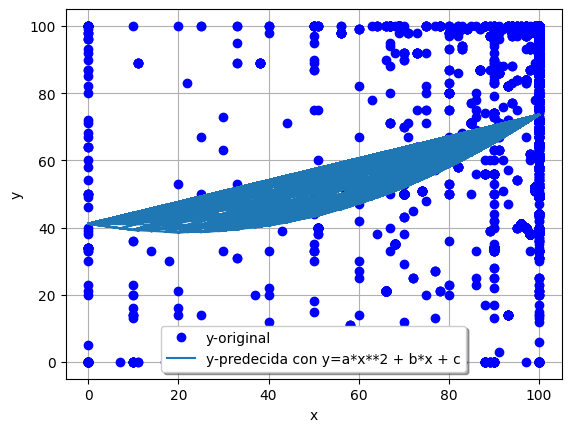

In [15]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [16]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred1) 
R2_Modelo2

0.09119701604588804

In [17]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

np.float64(0.3019884369407015)

Vars_Indep = data['host_response_rate'] 

Var_Dep = data['host_total_listings_count']

In [18]:
Vars_Indep = data['host_response_rate'] 
Var_Dep = data['host_total_listings_count']
x= Vars_Indep
y= Var_Dep

In [19]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [20]:
parametros1, covs= curve_fit(func1, x, y)
parametros1

array([-3.31898051e-02,  5.25101880e+00, -4.38053246e+01])

In [21]:
y_pred1 = func1(x, *parametros1)
y_pred1

0       149.398504
1       149.398504
2       149.398504
3       149.398504
4       149.398504
           ...    
6713    149.398504
6714    149.398504
6715    149.398504
6716    149.398504
6717    149.398504
Name: host_response_rate, Length: 6718, dtype: float64

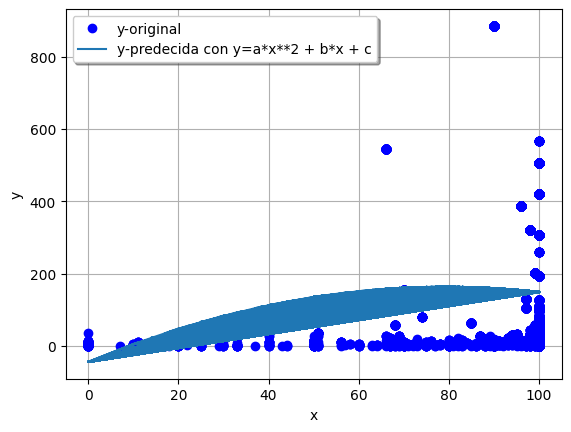

In [22]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [23]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred1) 
R2_Modelo2

0.019652553498487713

In [24]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

np.float64(0.14018756542035998)

Vars_Indep = data['host_response_rate'] 

Var_Dep = data['accommodates']

In [25]:
Vars_Indep = data['host_response_rate'] 
Var_Dep = data['accommodates']
x= Vars_Indep
y= Var_Dep

In [26]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [27]:
parametros1, covs= curve_fit(func1, x, y)
parametros1

array([ 9.43732095e-05, -1.31005996e-02,  2.93171556e+00])

In [28]:
y_pred1 = func1(x, *parametros1)
y_pred1

0       2.565388
1       2.565388
2       2.565388
3       2.565388
4       2.565388
          ...   
6713    2.565388
6714    2.565388
6715    2.565388
6716    2.565388
6717    2.565388
Name: host_response_rate, Length: 6718, dtype: float64

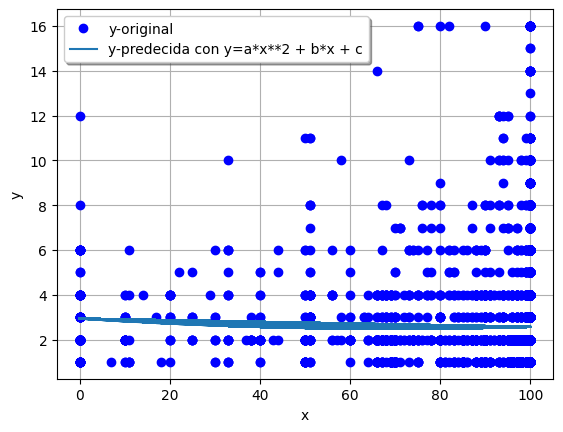

In [29]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [30]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred1) 
R2_Modelo2

0.0008351784567206533

In [31]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

np.float64(0.02889945426337067)

Vars_Indep = data['host_response_rate'] 

Var_Dep = data['reviews_per_month']

In [32]:
Vars_Indep = data['host_response_rate'] 
Var_Dep = data['reviews_per_month']
x= Vars_Indep
y= Var_Dep

In [33]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [34]:
parametros1, covs= curve_fit(func1, x, y)
parametros1

array([ 6.07176080e-05, -3.47669165e-03,  6.56882900e-01])

In [35]:
y_pred1 = func1(x, *parametros1)
y_pred1

0       0.91639
1       0.91639
2       0.91639
3       0.91639
4       0.91639
         ...   
6713    0.91639
6714    0.91639
6715    0.91639
6716    0.91639
6717    0.91639
Name: host_response_rate, Length: 6718, dtype: float64

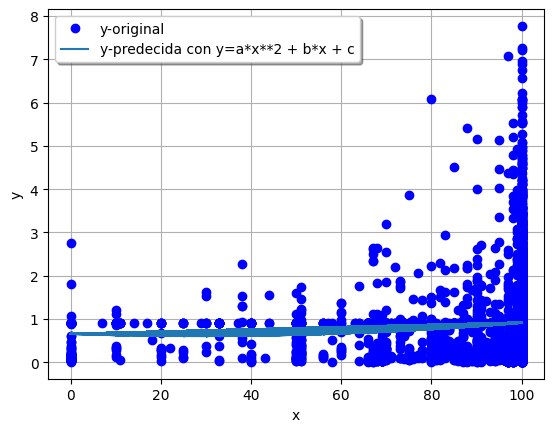

In [36]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [37]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred1) 
R2_Modelo2

0.01055462596552359

In [38]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

np.float64(0.1027357093007275)

Vars_Indep = data['host_response_rate'] 

Var_Dep = data['price']

In [39]:
Vars_Indep = data['host_response_rate'] 
Var_Dep = data['price']
x= Vars_Indep
y= Var_Dep

In [40]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [41]:
parametros1, covs= curve_fit(func1, x, y)
parametros1

array([ 3.42378285e-01, -5.74957284e+01,  3.20158805e+03])

In [42]:
y_pred1 = func1(x, *parametros1)
y_pred1

0       875.798062
1       875.798062
2       875.798062
3       875.798062
4       875.798062
           ...    
6713    875.798062
6714    875.798062
6715    875.798062
6716    875.798062
6717    875.798062
Name: host_response_rate, Length: 6718, dtype: float64

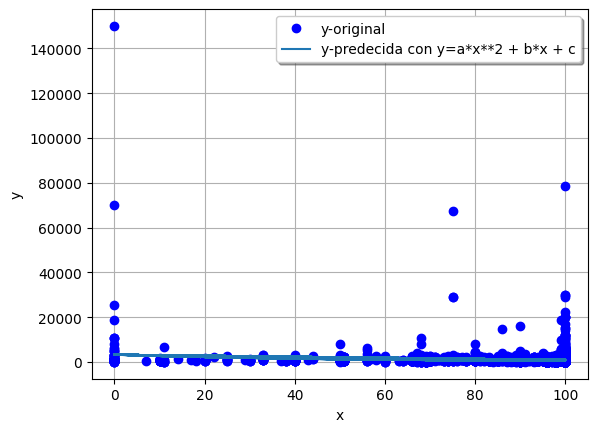

In [43]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [44]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred1) 
R2_Modelo2

0.014065971951091383

In [45]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

np.float64(0.11860005038401705)

# Modelo 2

Vars_Indep = data['host_response_rate'] 

Var_Dep = data['host_acceptance_rate']

In [46]:
Vars_Indep = data['host_response_rate'] 
Var_Dep = data['host_acceptance_rate']
x= Vars_Indep
y= Var_Dep

In [47]:
def  func2 (x, a, b, c):
    return a*np.exp(-b * x) + c

In [48]:
parametros2, covs= curve_fit(func2, x, y)
parametros2

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_15436\1187629963.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs= curve_fit(func2, x, y)


array([  -28.89656525, 20394.52808795,    69.65582451])

In [49]:
y_pred2 = func2(x, *parametros2)
y_pred2

0       69.655825
1       69.655825
2       69.655825
3       69.655825
4       69.655825
          ...    
6713    69.655825
6714    69.655825
6715    69.655825
6716    69.655825
6717    69.655825
Name: host_response_rate, Length: 6718, dtype: float64

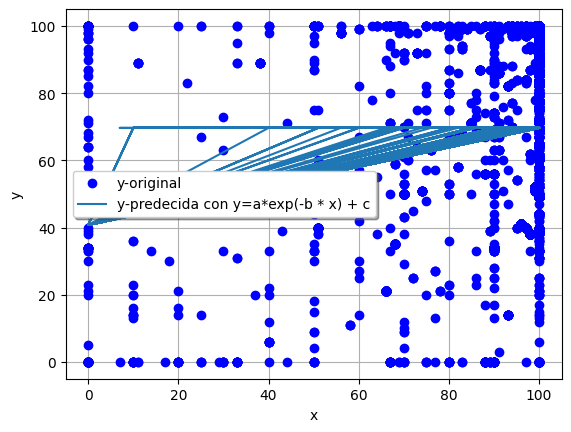

In [50]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred2, label="y-predecida con y=a*exp(-b * x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [51]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2) 
R2_Modelo2

0.016173052629656293

In [52]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

np.float64(0.12717331728651374)

Vars_Indep = data['host_response_rate'] 

Var_Dep = data['host_total_listings_count']

In [53]:
Vars_Indep = data['host_response_rate'] 
Var_Dep = data['host_total_listings_count']
x= Vars_Indep
y= Var_Dep

In [54]:
def  func2 (x, a, b, c):
    return a*np.exp(-b * x) + c

In [55]:
parametros2, covs= curve_fit(func2, x, y)
parametros2

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_15436\1187629963.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs= curve_fit(func2, x, y)


array([ -145.29511056, 24683.36915175,   149.58214759])

In [56]:
y_pred2 = func2(x, *parametros2)
y_pred2

0       149.582148
1       149.582148
2       149.582148
3       149.582148
4       149.582148
           ...    
6713    149.582148
6714    149.582148
6715    149.582148
6716    149.582148
6717    149.582148
Name: host_response_rate, Length: 6718, dtype: float64

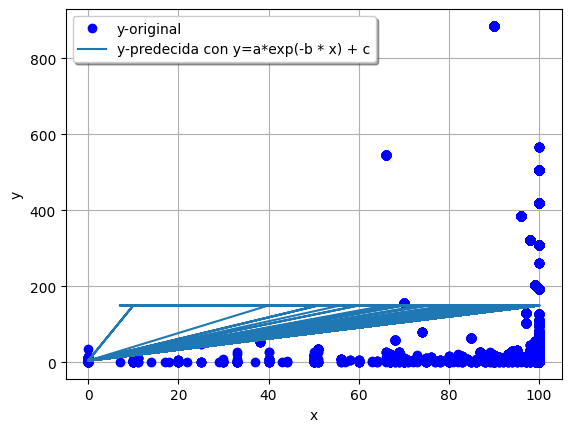

In [57]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred2, label="y-predecida con y=a*exp(-b * x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [58]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2) 
R2_Modelo2

0.008659273245723464

In [59]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

np.float64(0.09305521611238923)

Vars_Indep = data['host_response_rate'] 

Var_Dep = data['accommodates']

In [60]:
Vars_Indep = data['host_response_rate'] 
Var_Dep = data['accommodates']
x= Vars_Indep
y= Var_Dep

In [61]:
def  func2 (x, a, b, c):
    return a*np.exp(-b * x) + c

In [62]:
parametros2, covs= curve_fit(func2, x, y)
parametros2

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_15436\1187629963.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs= curve_fit(func2, x, y)


array([2.32574061e-01, 2.75452294e+02, 2.55446293e+00])

In [63]:
y_pred2 = func2(x, *parametros2)
y_pred2

0       2.554463
1       2.554463
2       2.554463
3       2.554463
4       2.554463
          ...   
6713    2.554463
6714    2.554463
6715    2.554463
6716    2.554463
6717    2.554463
Name: host_response_rate, Length: 6718, dtype: float64

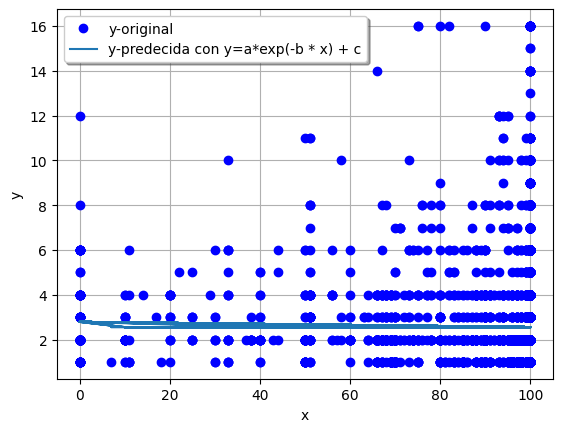

In [64]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred2, label="y-predecida con y=a*exp(-b * x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [65]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2) 
R2_Modelo2

0.00021430737431182845

In [66]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

np.float64(0.014639240906270667)

Vars_Indep = data['host_response_rate'] 

Var_Dep = data['reviews_per_month']

In [67]:
Vars_Indep = data['host_response_rate'] 
Var_Dep = data['reviews_per_month']
x= Vars_Indep
y= Var_Dep

In [68]:
def  func2 (x, a, b, c):
    return a*np.exp(-b * x) + c

In [69]:
parametros2, covs= curve_fit(func2, x, y)
parametros2

C:\Users\B_3mi\AppData\Local\Temp\ipykernel_15436\1187629963.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs= curve_fit(func2, x, y)


array([-0.27895786, 30.67017176,  0.88025416])

In [70]:
y_pred2 = func2(x, *parametros2)
y_pred2

0       0.880254
1       0.880254
2       0.880254
3       0.880254
4       0.880254
          ...   
6713    0.880254
6714    0.880254
6715    0.880254
6716    0.880254
6717    0.880254
Name: host_response_rate, Length: 6718, dtype: float64

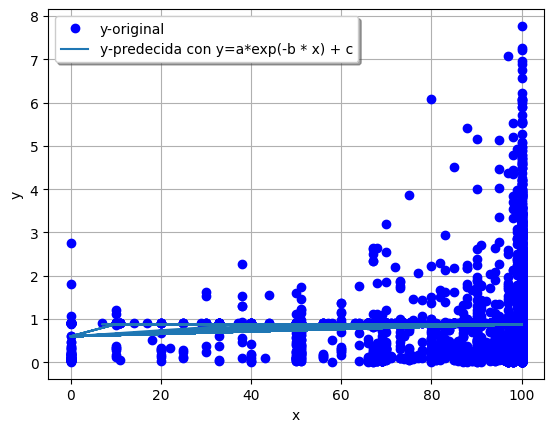

In [71]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred2, label="y-predecida con y=a*exp(-b * x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [72]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2) 
R2_Modelo2

0.002128642213983789

In [73]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo2)
R

np.float64(0.04613721073042657)

Vars_Indep = data['host_response_rate'] 

Var_Dep = data['price']

In [74]:
Vars_Indep = data['host_response_rate'] 
Var_Dep = data['price']
x= Vars_Indep
y= Var_Dep

In [75]:
def  func2 (x, a, b, c):
    return a*np.exp(-b * x) + c

In [76]:
parametros2, covs= curve_fit(func1, x, y, maxfev=10000)
parametros2

array([ 3.42378285e-01, -5.74957284e+01,  3.20158805e+03])

In [77]:
y_pred2 = func2(x, *parametros2)
y_pred2

c:\Users\B_3mi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       inf
1       inf
2       inf
3       inf
4       inf
       ... 
6713    inf
6714    inf
6715    inf
6716    inf
6717    inf
Name: host_response_rate, Length: 6718, dtype: float64

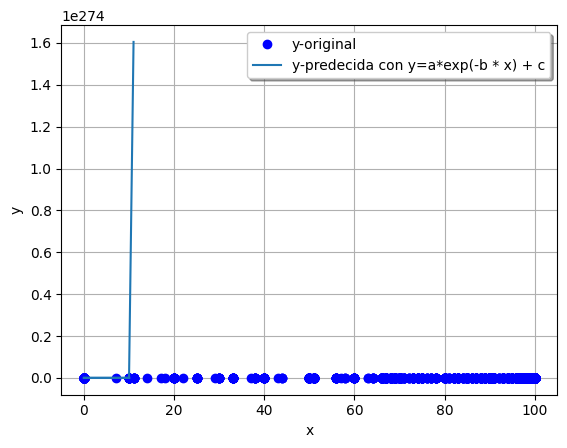

In [78]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred2, label="y-predecida con y=a*exp(-b * x) + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [79]:
#R2_Modelo2 = r2_score(y, y_pred2) 
#R2_Modelo2

In [80]:
#Calculamos el coeficiente de correlación del modelo
#R = np.sqrt(R2_Modelo2)
#R

## Realizar una tabla de todos los coeficientes de determinación y correlación obtenidos

In [81]:
correlaciones = ["host_response_rate", "host_acceptance_rate", "host_total_listings_count", "accommodates", "reviews_per_month", "price"]  # Cambia por las columnas que necesites
df_numeric = data[correlaciones]
matriz_corr = df_numeric.corr()

matriz_corr

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,reviews_per_month,price
host_response_rate,1.000000,0.282345,0.106019,-0.013349,0.093151,-0.098148
host_acceptance_rate,0.282345,1.000000,-0.531262,0.211642,0.157348,0.040872
host_total_listings_count,0.106019,-0.531262,1.000000,-0.290847,-0.058211,-0.095855
accommodates,-0.013349,0.211642,-0.290847,1.000000,0.137191,0.230498
reviews_per_month,0.093151,0.157348,-0.058211,0.137191,1.000000,-0.003417
price,-0.098148,0.040872,-0.095855,0.230498,-0.003417,1.000000


<Axes: >

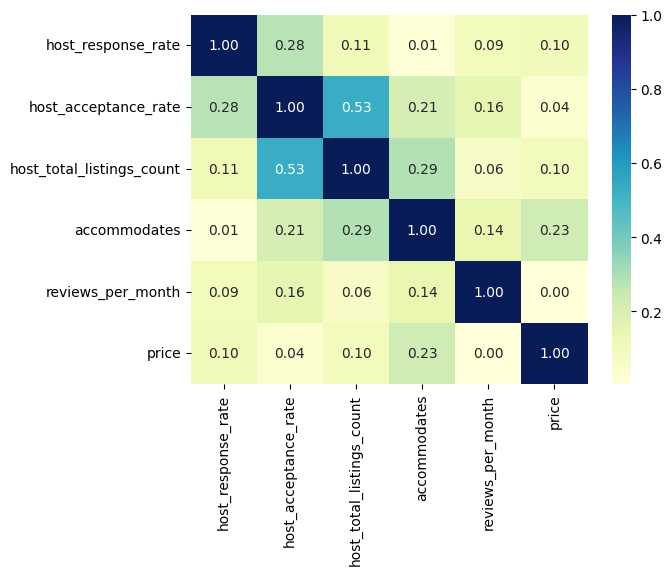

In [82]:
Corr_Factors1=abs(matriz_corr)
Heat_Map=sns.heatmap(Corr_Factors1,cmap="YlGnBu",annot=True,fmt=".2f")
Heat_Map